# Problem statement
- who are all the person claims the insurance frequently

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Insurance Logistic regression.csv')
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


### Basic checks

In [4]:
data.shape

(1338, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [8]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

### EDA

<AxesSubplot:xlabel='insuranceclaim', ylabel='count'>

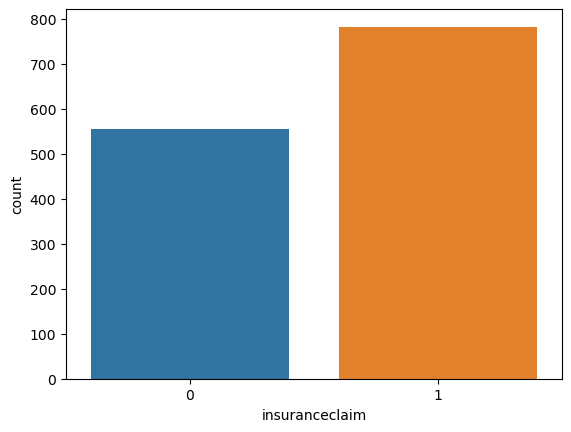

In [10]:
# checking if the target is balanced or not
sns.countplot(x=data.insuranceclaim)

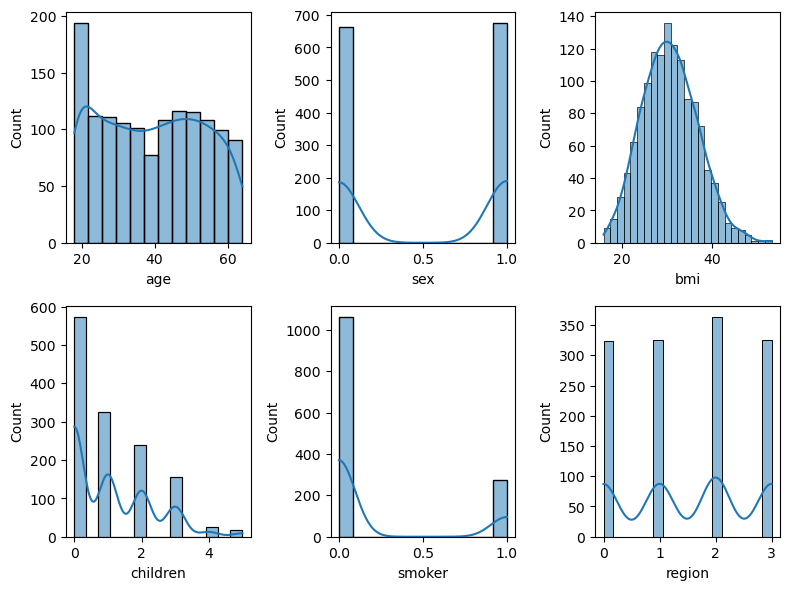

In [11]:
plt.figure(figsize=(8,6),facecolor='white')
plotnumber=1

for column in data.drop('insuranceclaim',axis=1):
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='count'>

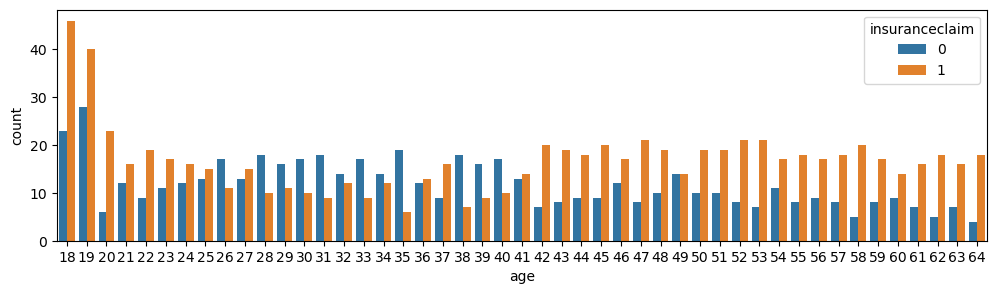

In [12]:
plt.figure(figsize=(12,3))
sns.countplot(data=data,x='age',hue='insuranceclaim')

- from the above plot, we can see that the age of 18 and 19 people are given more insurance claim and then it gradually decreases from the age 28 to 40 and then again takes a gradual increase and stays the same from the age 42 to 64

<AxesSubplot:xlabel='sex', ylabel='count'>

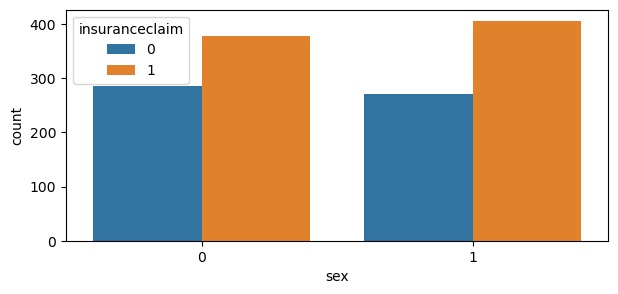

In [13]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='sex',hue='insuranceclaim')

<AxesSubplot:xlabel='children', ylabel='count'>

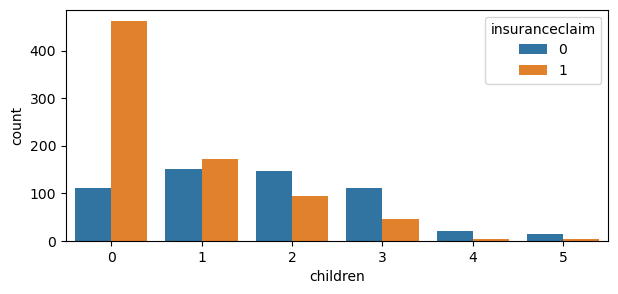

In [14]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='children',hue='insuranceclaim')

- from the above plot we can see that people who have no children are given the most preference and people with 4-5 children are given the least preference

<AxesSubplot:xlabel='region', ylabel='count'>

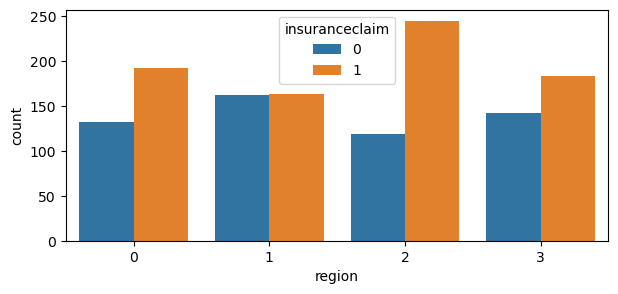

In [15]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='region',hue='insuranceclaim')

- from the above plot we can see that the people from region 2 are given the most preference and then region 0 and 3 has the same preference

<AxesSubplot:xlabel='age', ylabel='charges'>

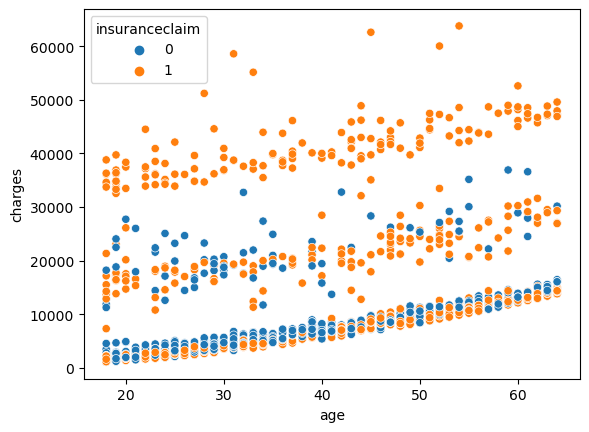

In [16]:
sns.scatterplot(data=data,x='age',y='charges',hue='insuranceclaim')

<AxesSubplot:xlabel='age', ylabel='children'>

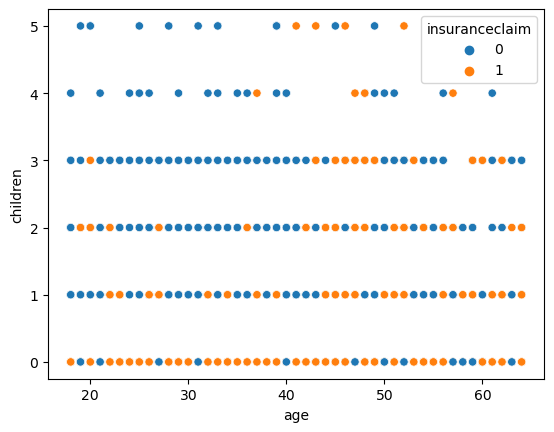

In [17]:
sns.scatterplot(data=data,x='age',y='children',hue='insuranceclaim')

<AxesSubplot:xlabel='age', ylabel='region'>

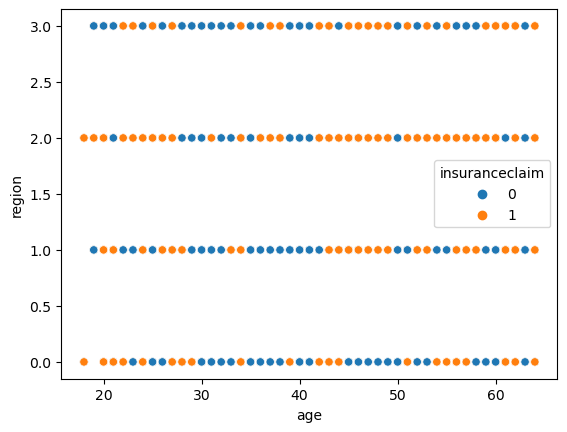

In [18]:
sns.scatterplot(data=data,x='age',y='region',hue='insuranceclaim')

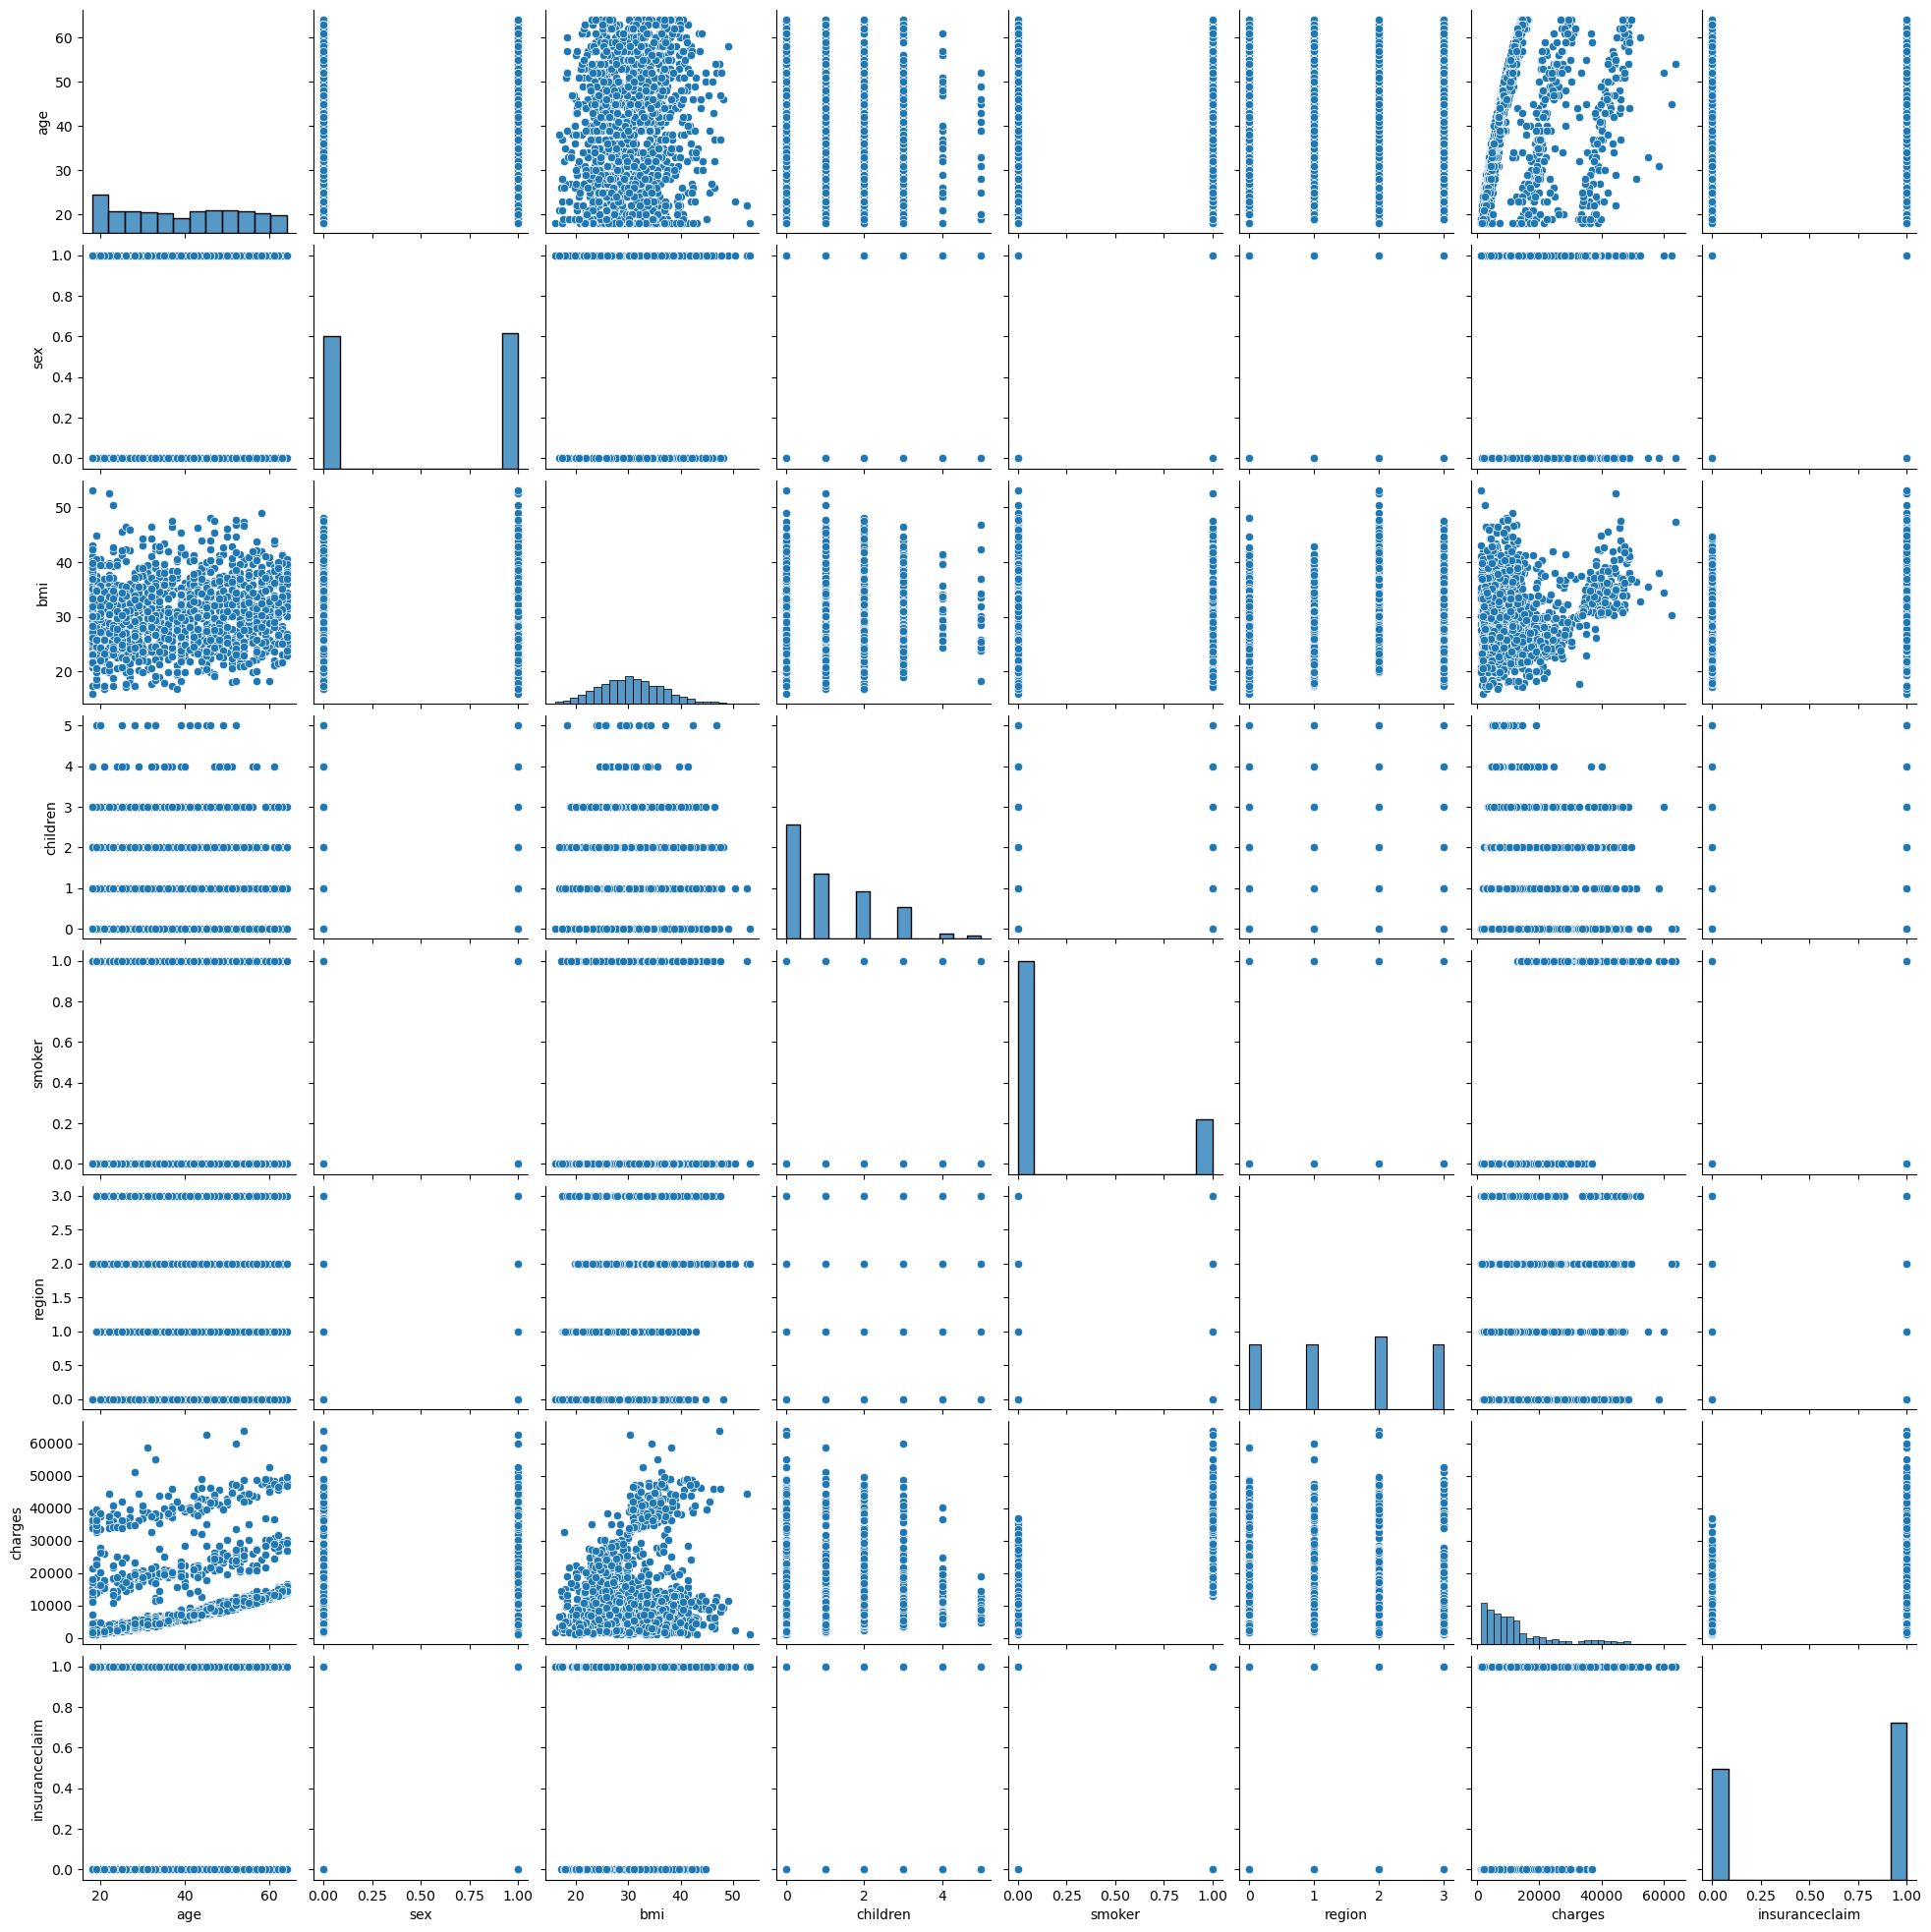

In [19]:
## Multivariate
sns.pairplot(data=data)

## Data preprocessing

In [20]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [21]:
data.duplicated().sum()

1

In [25]:
data.loc[data.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
195,19,1,30.59,0,0,1,1639.5631,1
581,19,1,30.59,0,0,1,1639.5631,1


In [26]:
data.drop_duplicates(keep= 'first',inplace=True )

In [27]:
data.duplicated().sum()

0

In [23]:
for i in range(len(data)):
    print(data[i])

KeyError: 0

In [ ]:
data.drop(data[580]

In [ ]:
## Splitting data
x=data.iloc[:,:-1]
y=data.insuranceclaim

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

### Model creation

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = logistic.predict(x_train)
accuracy_score(y_train,y_train_pred)

In [ ]:
y_pred = logistic.predict(x_test)

accuracy_score(y_test,y_pred)

In [ ]:
y_pred = logistic.predict(x_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
probability_values = logistic.predict_proba(x_test)
probability_values

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,roc_auc_score,precision_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
import  matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_predict = logistic.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict)
plt.plot(fpr,tpr,color='black')
plt.show()